In [85]:
# %pip install -U langchain langchain-openai langchain-upstage langgraph langfuse faiss-cpu python-dotenv langchain-community langchain-teddynote

In [86]:
from dotenv import load_dotenv
from langchain.agents import create_agent
from langchain_upstage import ChatUpstage
from langchain_community.tools import TavilySearchResults
load_dotenv()

llm = ChatUpstage(model="solar-mini", temperature=0)
tools = [TavilySearchResults()]
web_search_agent = create_agent(model=llm, tools=tools)
frontend_expert = create_agent(model=llm, tools=tools)
backend_expert = create_agent(model=llm, tools=tools)

In [87]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

class RecommendationState(TypedDict):
    current_node_type: str
    question: str
    context: str
    messages: Annotated[list, add_messages] # 대화 기록

class PlanNodeState(RecommendationState):
    parent_info: str

In [88]:
def parent_node_fetch(state: PlanNodeState) -> PlanNodeState:
    """부모 노드의 정보를 조회하는 노드"""
    pass

In [89]:
def project_spec_fetch(state: PlanNodeState)->PlanNodeState:
    """현재 프로젝트의 스펙을 조회하는 노드"""
    pass

In [90]:
def candidate_node_fetch(state: PlanNodeState) -> PlanNodeState:
    """이번 흐름에서 구현될 후보 노드의 정보를 가져옵니다. (실제 정보가 채워질 후보 노드의 정보)"""
    pass

In [91]:
def epic_node_process(state: PlanNodeState) -> PlanNodeState:
    """현재 처리해야 될 노드가 Epic인 경우의 처리 로직"""
    pass

In [92]:
def story_node_process(state: PlanNodeState) -> PlanNodeState:
    """현재 처리해야 될 노드가 Story인 경우의 처리 로직"""
    pass

In [93]:
def task_node_process(state: PlanNodeState) -> PlanNodeState:
    """현재 처리해야 될 노드가 Task인 경우의 처리 로직"""
    pass

In [94]:
def sub_task_node_process(state: PlanNodeState) -> PlanNodeState:
    """현재 처리해야 될 노드가 Sub-Task인 경우의 처리 로직"""
    pass

In [95]:
def contributor_info_fetch(state: PlanNodeState) -> PlanNodeState:
    """기여자 정보를 조회하는 노드 - 기여자의 기술 스택, 경험등을 기반으로 기술 스택을 추천합니다. 만약 기여자 정보가 없을경우 건너뜁니다."""
    pass

In [96]:
def tech_stack_create(state: PlanNodeState) -> PlanNodeState:
    """기술 스택 정보를 생성하는 노드"""
    pass

In [97]:
def structured_output_parser(state: PlanNodeState) -> PlanNodeState:
    """구조화된 출력을 생성하는 노드"""
    pass

In [98]:
def sub_node_info_create(state: PlanNodeState) -> PlanNodeState:
    """현재 노드의 정보를 생성하는 노드 (분기점) 하위 태스크로의 전달 역할"""
    pass

In [99]:
def node_feedback(state: PlanNodeState) -> PlanNodeState:
    """생성된 노드 정보에 대한 피드백을 수행하는 노드"""
    pass

In [100]:
def struct_feedback(state: PlanNodeState) -> PlanNodeState:
    """구조화된 출력에 대한 피드백을 수행하는 노드"""
    pass

In [101]:
def tech_stack_integrator(state: PlanNodeState) -> PlanNodeState:
    """추천된 기술 스택의 정보를 통합하는 노드"""
    pass

In [102]:
def candidate_node_recommand(state: PlanNodeState) -> PlanNodeState:
    """생성된 현재 노드를 기반을 하위 노드를 추천하는 노드 (현재 노드가 Sub-Task인 경우는 건너뜀)"""
    pass

In [103]:
def sibiling_node_fetch(state: PlanNodeState) -> PlanNodeState:
    """현재 노드의 형제 노드 정보를 조회하는 노드(중복 기능을 제거하는 용도)"""
    pass

In [104]:
from langchain_core.tools import tool
from langchain.agents import create_agent
from langchain.agents.structured_output import ToolStrategy
from pydantic import BaseModel

class TechNameId(BaseModel):
    id: int

def query_db(keyword)->str:
    pass

@tool
def insert_official_tech_name(tech_name: str) -> int:
    """
    만약 search_official_tech_name 도구로 검색한 기술 스택이 데이터베이스에 존재하지 않는다면,
    기술 스택의 공식 영문 명칭을 데이터베이스에 삽입합니다.
    새로운 기술 스택을 추가할 때 이 도구를 사용하세요.
    
    Args:
        tech_name (str): 삽입할 기술 스택의 공식 명칭 (kebab-case, 예: 'react', 'spring-boot')
        return (int): 삽입된 기술 스택의 DB (Key)값
    """

    # DB 삽입 로직 구현
    return "Insertion successful"

@tool
def search_official_tech_name(keyword: str) -> int:
    """
    기술 스택의 공식 영문 명칭을 데이터베이스에서 검색합니다.
    기술의 이름이 확실하지 않거나, 공식 명칭을 확인해야 할 때 이 도구를 사용하세요.
    Args:
        keyword (str): 검색할 기술 스택의 이름 (kebab-case, 예: 'react', 'spring')
        return (int): 기술 스택의 DB (Key)값
    """
    result = query_db(keyword)
    return result

tech_name_agent = create_agent(model=llm, 
                               tools=[search_official_tech_name, insert_official_tech_name], 
                               response_format=ToolStrategy(TechNameId))

In [105]:
from typing import Any

class ReturnNodeValue:
    # 초기화
    def __init__(self, node_secret: str):
        self._value = node_secret

    # 호출시 상태 업데이트
    def __call__(self, state: PlanNodeState) -> Any:
        print(f"Adding {self._value} to {state['aggregate']}")
        return {"aggregate": [self._value]}

In [106]:
def route_task(state: RecommendationState) -> str:
    if state["current_node_type"] == "TASK":
        return ["frontend_expert", "backend_expert"]
    elif state["current_node_type"] == "SUB_TASK":
        return "web_search_agent"

In [107]:
from langgraph.graph import StateGraph, END, START

recommend_graph_builder = StateGraph(RecommendationState)

recommend_graph_builder.add_node("frontend_expert", frontend_expert)
recommend_graph_builder.add_node("backend_expert", backend_expert)
recommend_graph_builder.add_node("web_search_agent", web_search_agent)
recommend_graph_builder.add_node("tech_name_agent", tech_name_agent)
recommend_graph_builder.add_node("tech_stack_integrator", tech_stack_integrator)

recommend_graph_builder.add_conditional_edges(START, route_task,
                                              ["frontend_expert", "backend_expert", "web_search_agent"])
recommend_graph_builder.add_edge("frontend_expert", "tech_name_agent")
recommend_graph_builder.add_edge("backend_expert", "tech_name_agent")
recommend_graph_builder.add_edge("web_search_agent", "tech_name_agent")
recommend_graph_builder.add_edge("tech_name_agent", "tech_stack_integrator")
recommend_graph_builder.add_edge("tech_stack_integrator", END)

recommend_graph = recommend_graph_builder.compile()


builder = StateGraph(PlanNodeState)
builder.add_node("parent_node_fetch", ReturnNodeValue("parent_node_fetch"))
builder.add_node("project_spec_fetch", ReturnNodeValue("project_spec_fetch"))
builder.add_node("contributor_info_fetch", ReturnNodeValue("contributor_info_fetch"))
builder.add_node("candidate_node_fetch", ReturnNodeValue("candidate_node_fetch"))
builder.add_node("epic_node_process", epic_node_process)
builder.add_node("story_node_process", story_node_process)
builder.add_node("sub_node_info_create", sub_node_info_create)
builder.add_node("task_node_process", task_node_process)
builder.add_node("sub_task_node_process", sub_task_node_process)
builder.add_node("tech_stack_create", tech_stack_create)
builder.add_node("tech_stack_recommendation", recommend_graph)
builder.add_node("structured_output_parser", structured_output_parser)
builder.add_node("node_feedback", node_feedback)
builder.add_node("struct_feedback", struct_feedback)
builder.add_node("sibiling_node_fetch", sibiling_node_fetch)
builder.add_node("candidate_node_recommand", candidate_node_recommand)

In [108]:
def route_fetch(state: PlanNodeState) -> str:
    return "parent_node_fetch"

In [109]:
def route_node(state: PlanNodeState) -> str:
    return "epic_node_process"

In [110]:
def route_agent_node(state: PlanNodeState) -> str:
    return "web_search_agent"

In [111]:
def route_teck_stack(state: PlanNodeState) -> str:
    return "tech_steck_create"

In [112]:
def route_sub_task_tech_stack(state: PlanNodeState) -> str:
    return "sub_task_tech_stack_create"

In [113]:
def route_feedback_loop(state: PlanNodeState) -> str:
    return "node_feedback"

In [114]:
def route_struct_feedback(state: PlanNodeState) -> str:
    return "struct_feedback"

In [115]:
def route_agent_result(state: PlanNodeState) -> str:
    return "structured_output_parser"

In [116]:
def loop_condition(state: PlanNodeState) -> bool:
    return False

In [117]:
builder.add_edge(START, "parent_node_fetch")
builder.add_edge(START, "project_spec_fetch")
builder.add_edge(START, "contributor_info_fetch")
builder.add_edge(START, "sibiling_node_fetch")
builder.add_edge(START, "candidate_node_fetch")
builder.add_edge("parent_node_fetch", "sub_node_info_create")
builder.add_edge("project_spec_fetch", "sub_node_info_create")
builder.add_edge("contributor_info_fetch", "sub_node_info_create")
builder.add_edge("sibiling_node_fetch", "sub_node_info_create")
builder.add_edge("candidate_node_fetch", "sub_node_info_create")
builder.add_conditional_edges("sub_node_info_create",
                              route_node,
                              ["epic_node_process", "story_node_process", "task_node_process", "sub_task_node_process"])
builder.add_edge("epic_node_process", "node_feedback")
builder.add_edge("story_node_process", "node_feedback")
builder.add_edge("task_node_process", "tech_stack_recommendation")
builder.add_edge("sub_task_node_process", "tech_stack_create")
builder.add_edge("tech_stack_create", "tech_stack_recommendation")
builder.add_edge("tech_stack_recommendation", "node_feedback")
builder.add_conditional_edges("node_feedback", route_feedback_loop, ["sub_node_info_create", "candidate_node_recommand"])
builder.add_edge("candidate_node_recommand", "structured_output_parser")
builder.add_edge("structured_output_parser", "struct_feedback")
builder.add_conditional_edges("struct_feedback", route_struct_feedback,
                              [ "structured_output_parser", END])
builder.add_conditional_edges("struct_feedback", loop_condition, ["sub_node_info_create", END])


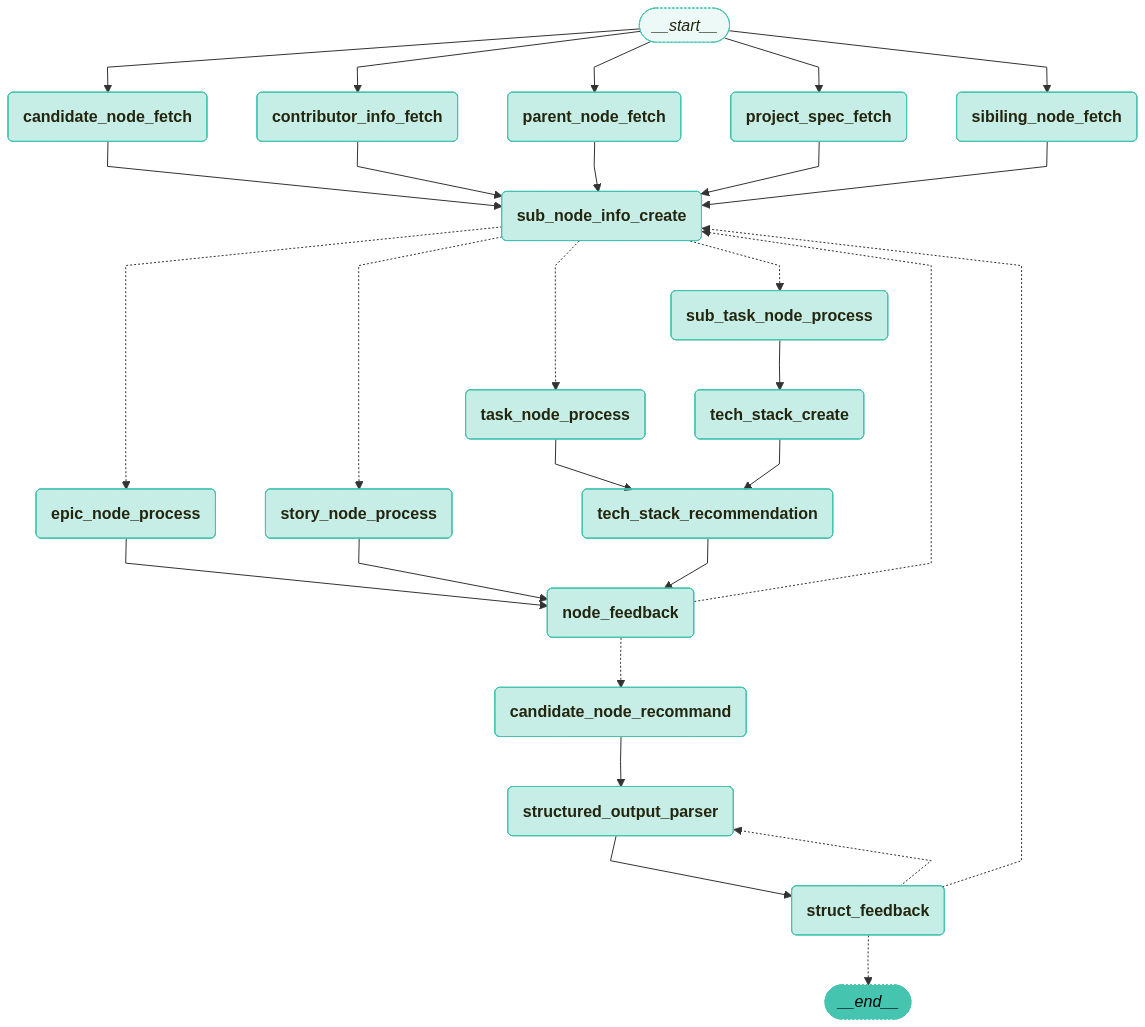

In [118]:
from langchain_teddynote.graphs import visualize_graph
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

graph = builder.compile()
visualize_graph(graph, xray=False)